In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
data= pd.read_csv('Analysis of Super Store - DA.csv')

In [50]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [51]:
data.shape

(9994, 13)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [53]:
print(data['Category'].unique())

['Furniture' 'Office Supplies' 'Technology']


Viewing the states in the data set

In [54]:
print(data['State'].unique())

['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia']


In [55]:
no_of_states = data['State'].nunique()
print("There are %d states in this data frame."%no_of_states)

There are 49 states in this data frame.


In [56]:
print(data['Sub-Category'].unique())
no_of_subcategory= data['Sub-Category'].nunique() 
print("Categories are divided into %d subcategories"%no_of_subcategory)

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']
Categories are divided into 17 subcategories


In [57]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [58]:
data["Country"].unique()

array(['United States'], dtype=object)

# Cleaning the unnecessary part like postal code and the not unique column i.e postal code and country 


In [59]:
data.drop(["Country","Postal Code"],axis=1,inplace=True)

ploting the columns with respect of the 

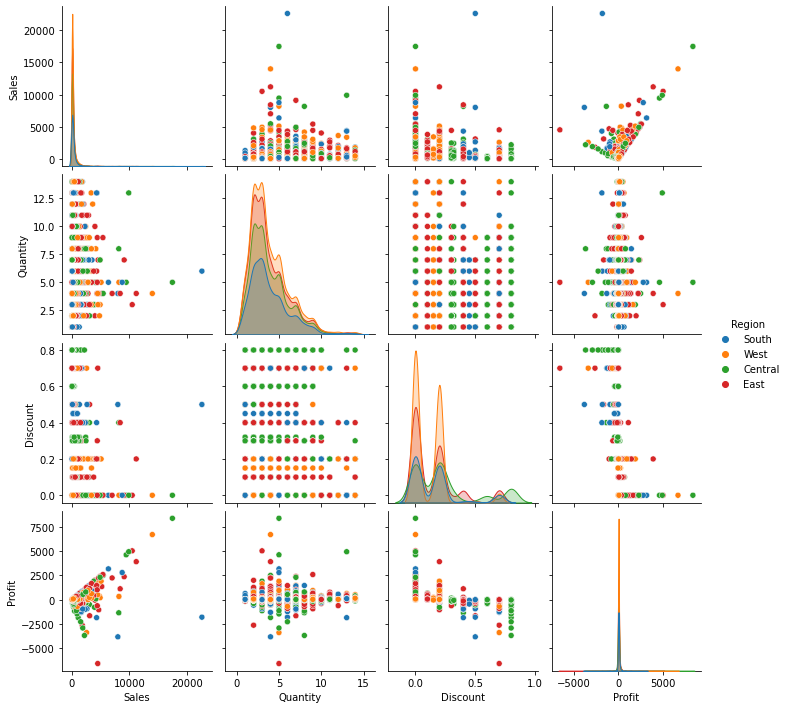

In [60]:
sns.pairplot(data,hue="Region")

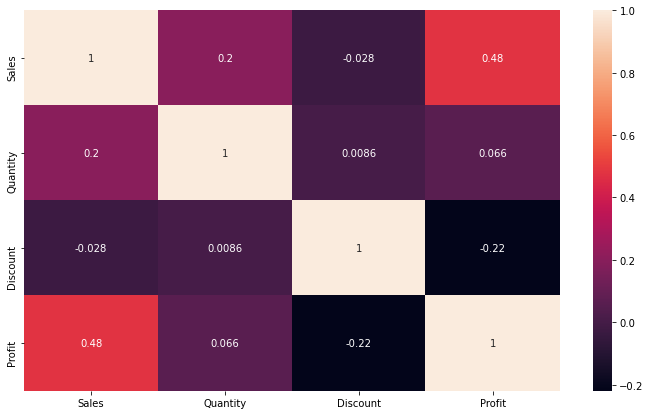

In [61]:
fig,axes=plt.subplots(1,1,figsize=(12,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [62]:
sub=data.groupby("Sub-Category")["Quantity","Profit","Discount"]

<ipython-input-62-a97e0e52fea3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sub=data.groupby("Sub-Category")["Quantity","Profit","Discount"]


Accessories


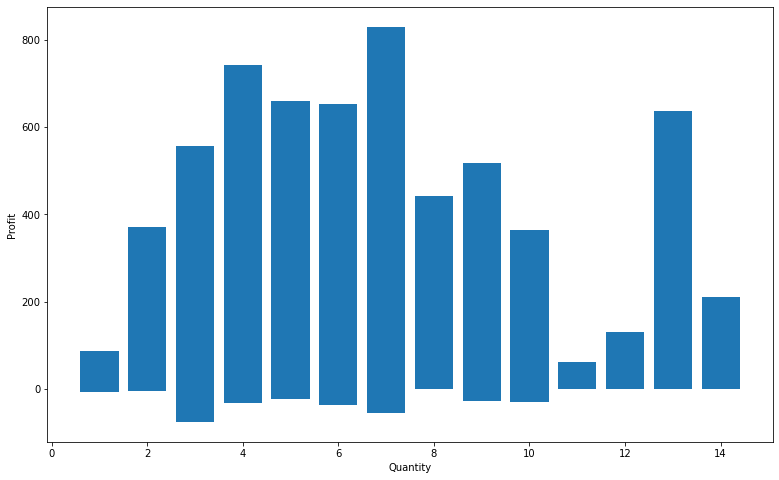

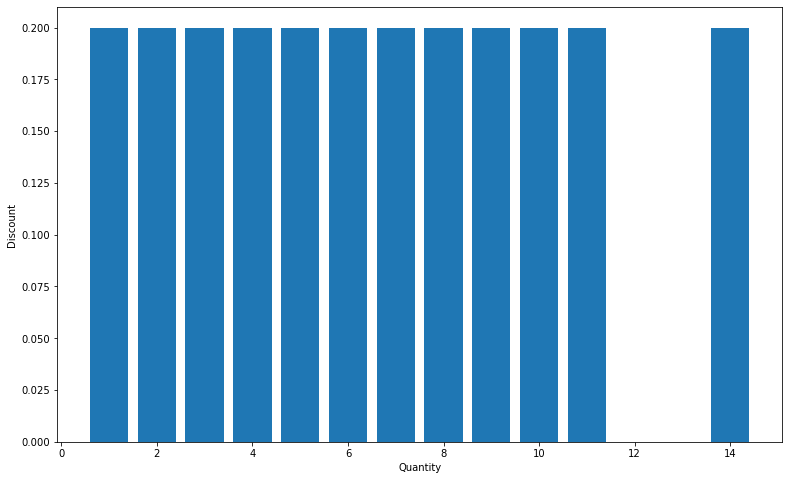

Appliances


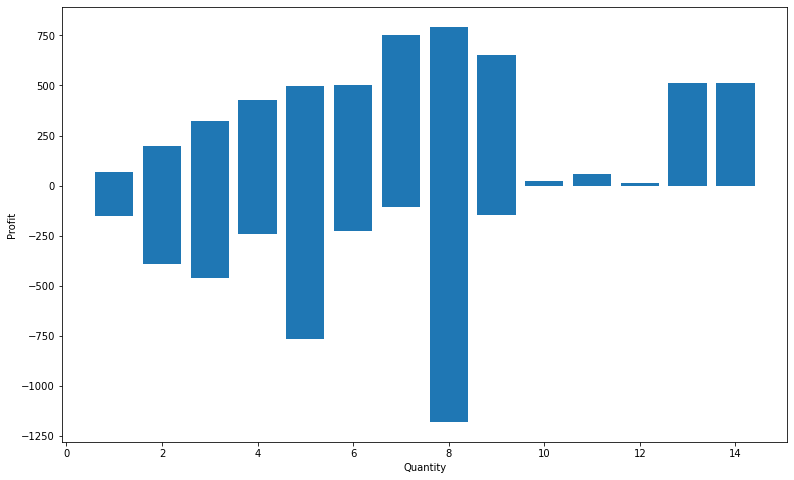

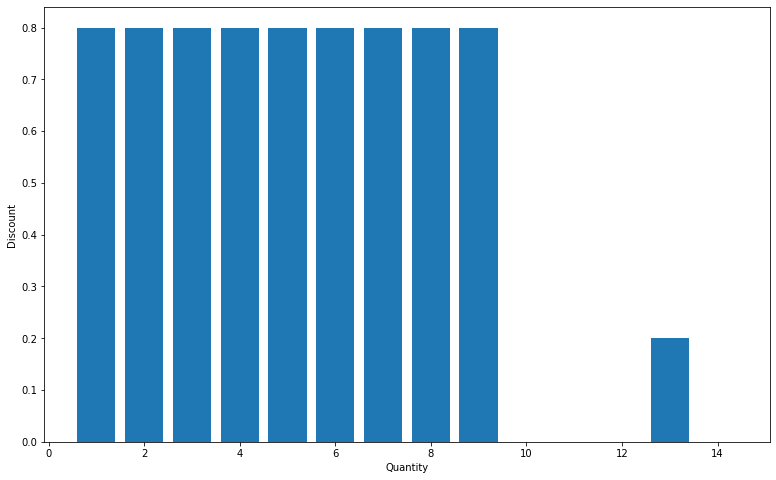

Art


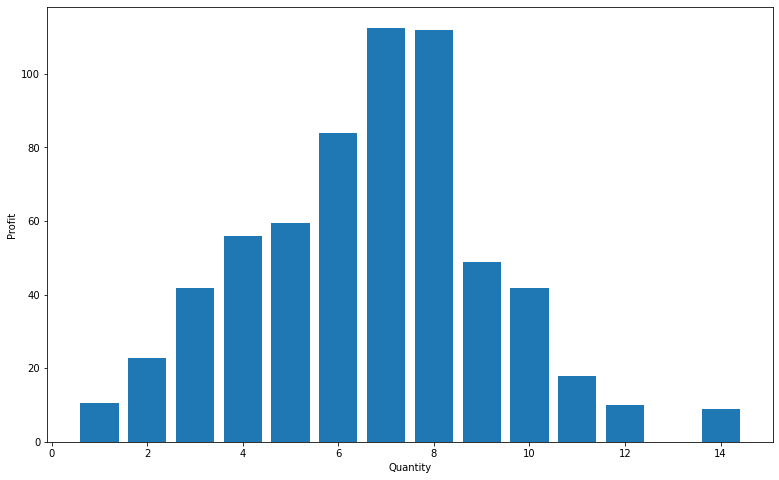

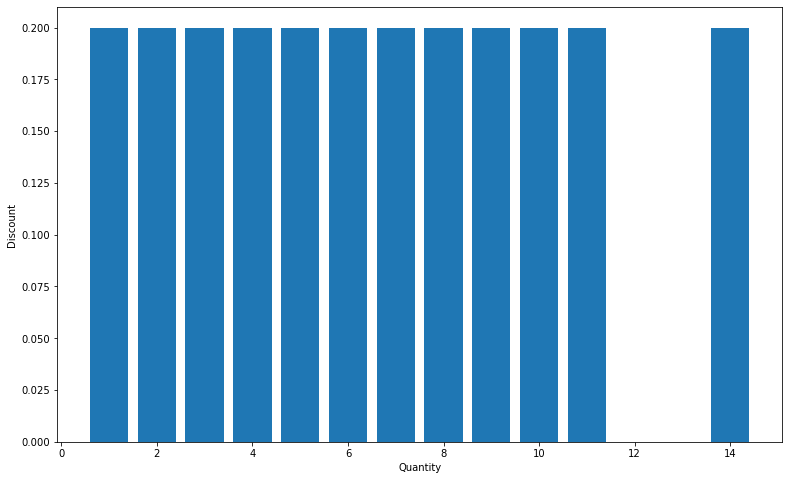

Binders


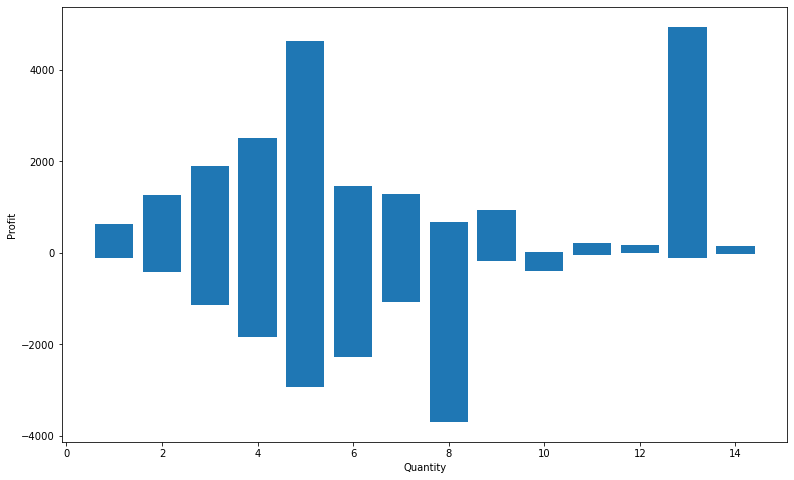

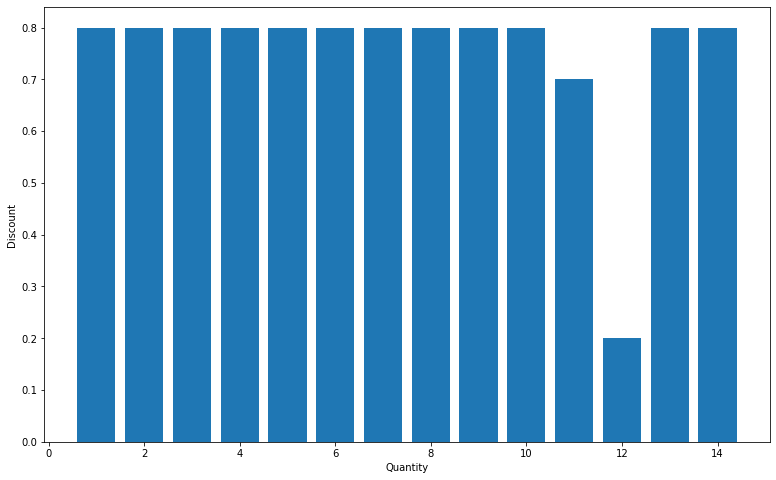

Bookcases


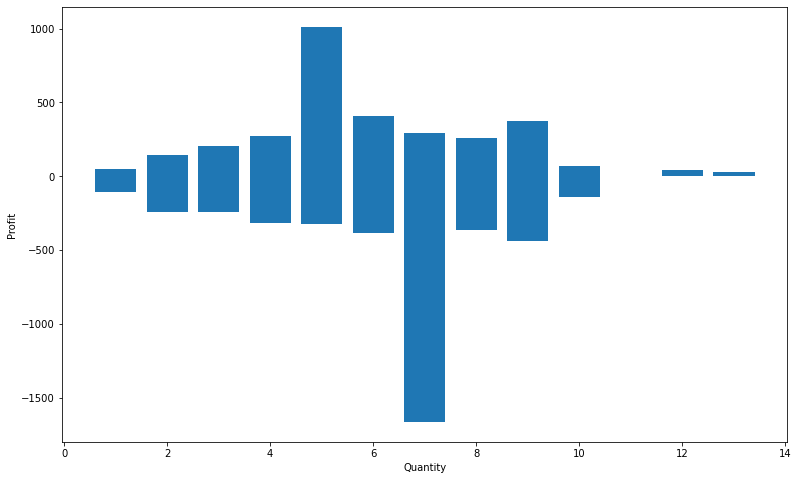

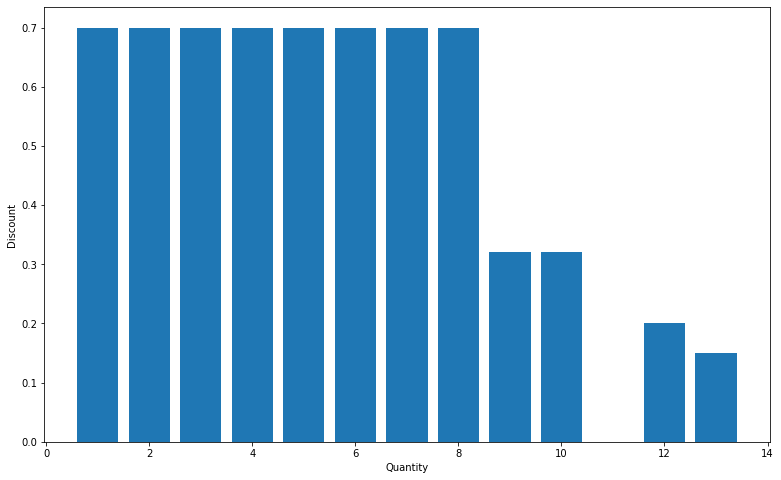

Chairs


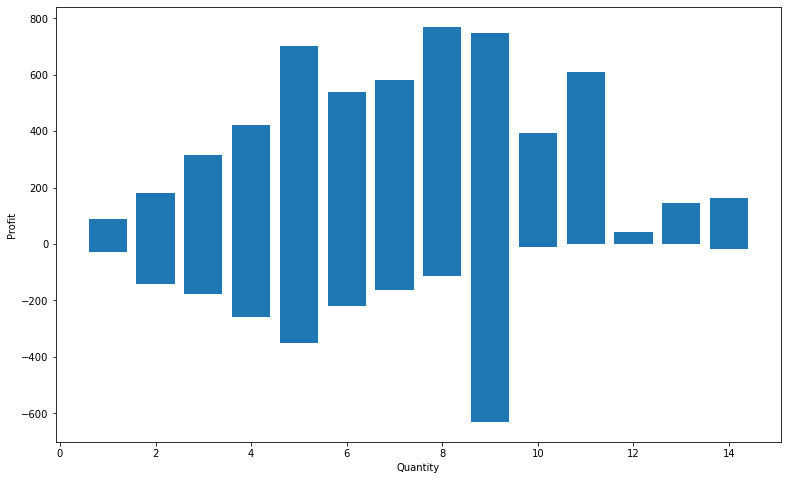

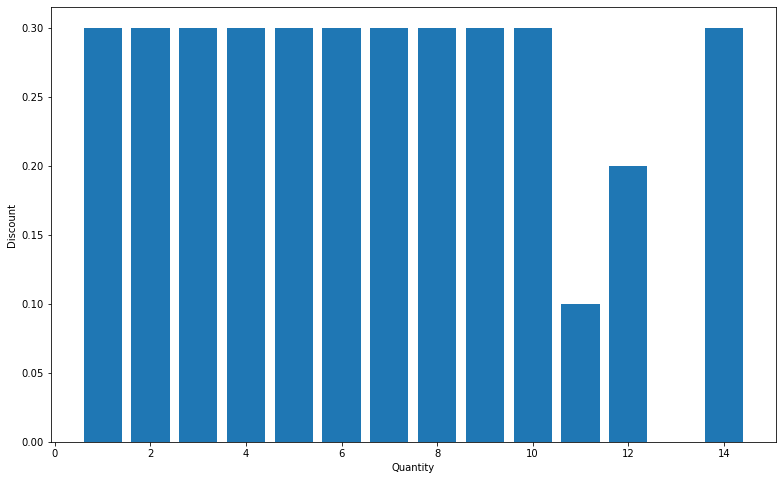

Copiers


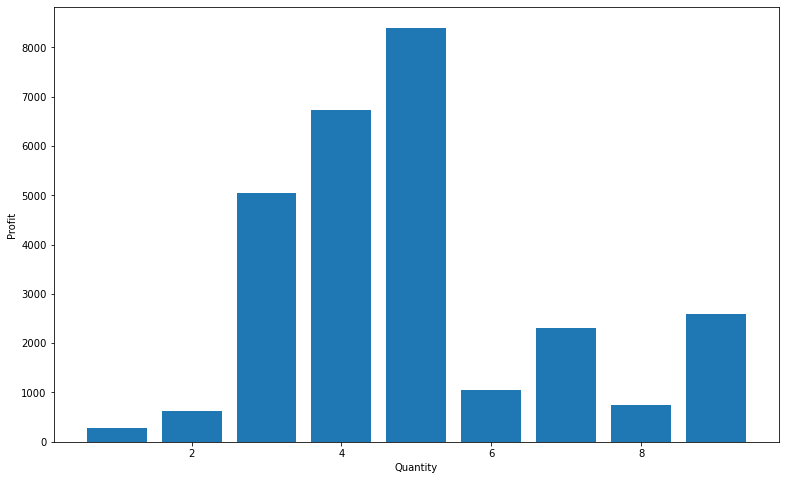

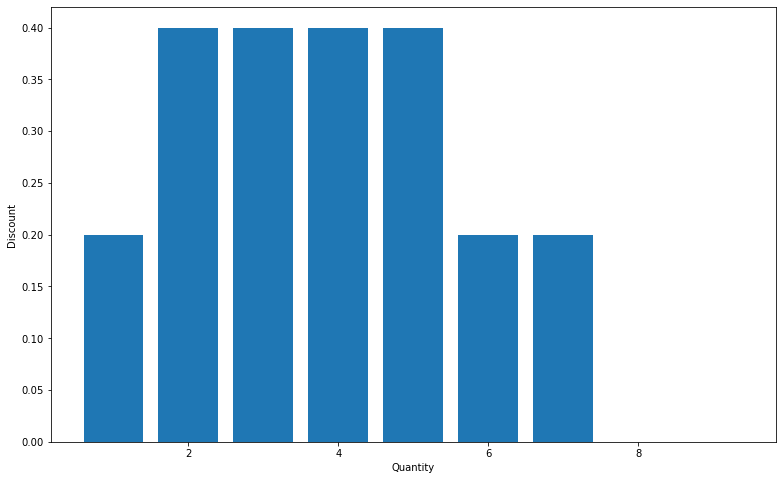

Envelopes


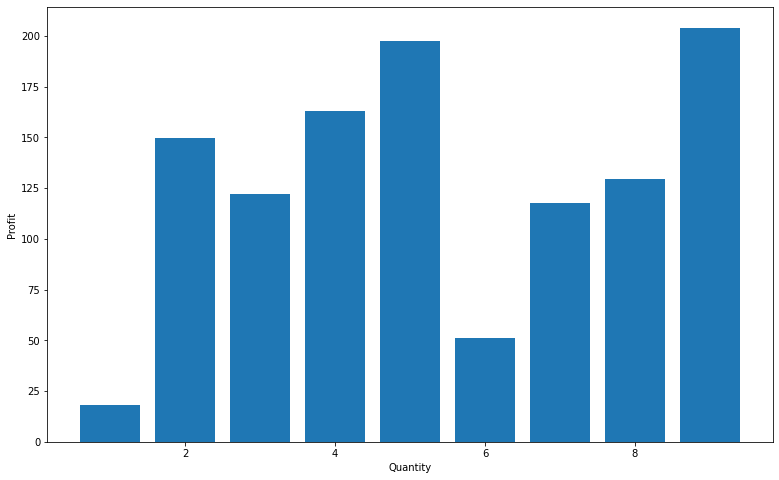

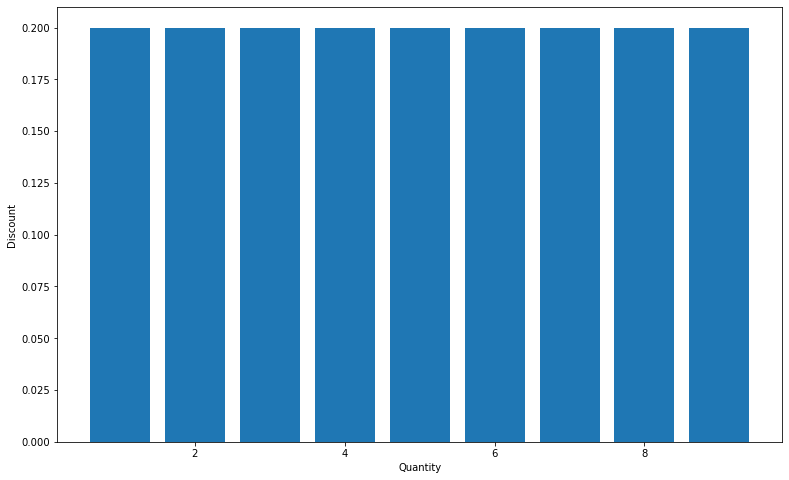

Fasteners


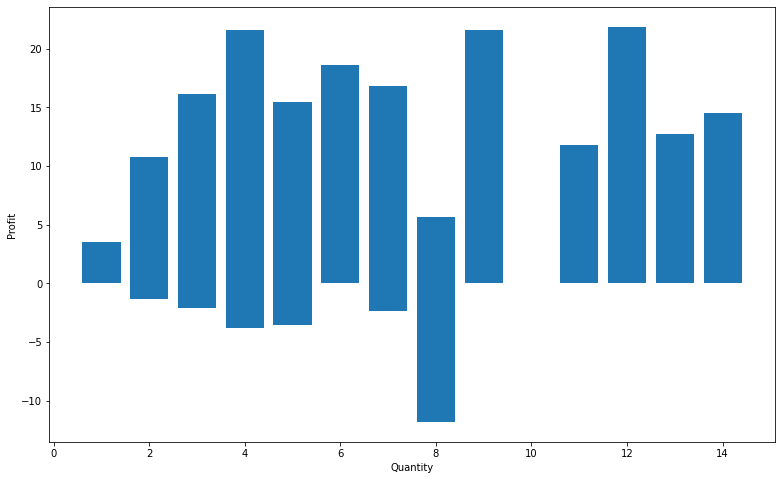

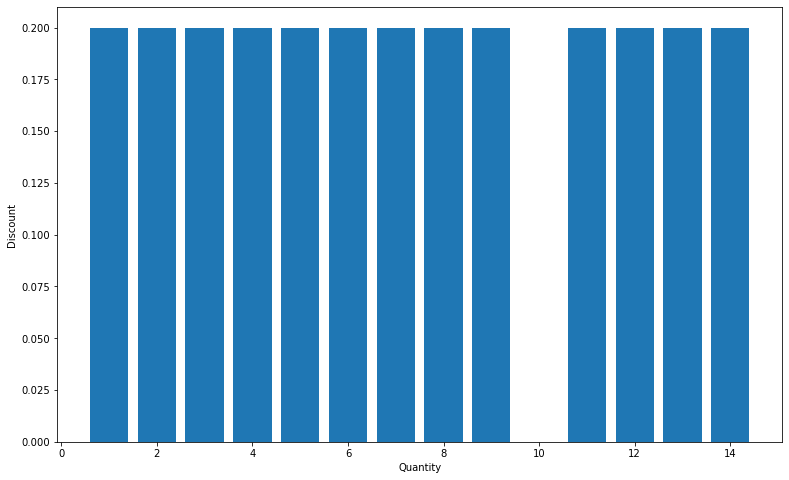

Furnishings


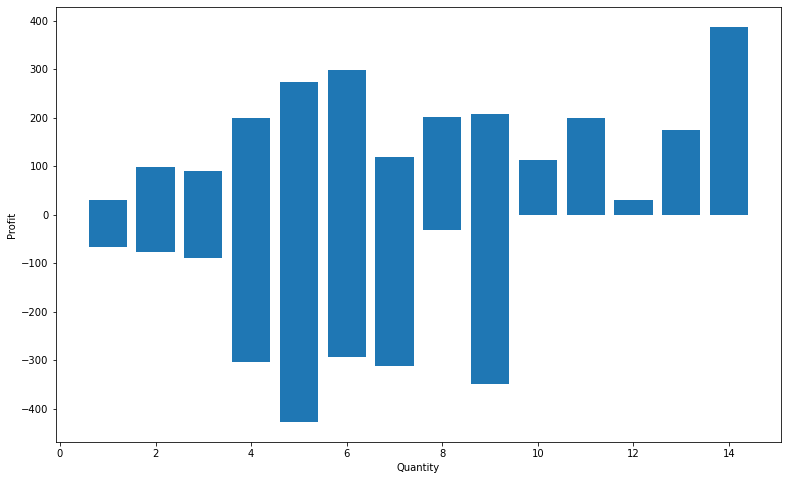

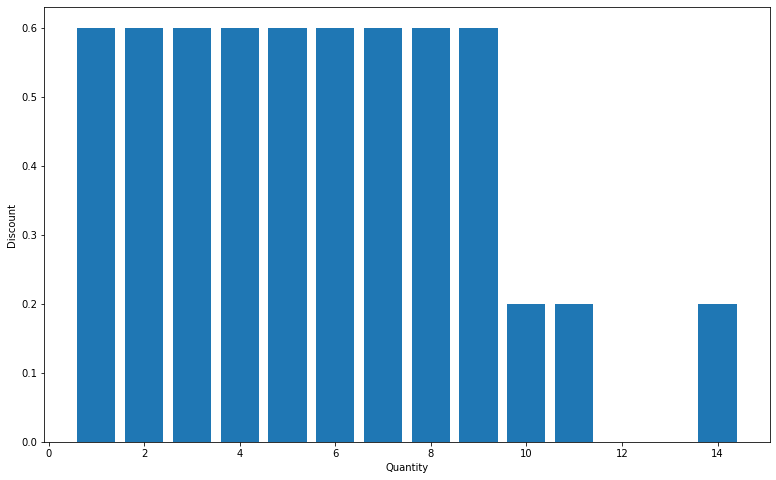

Labels


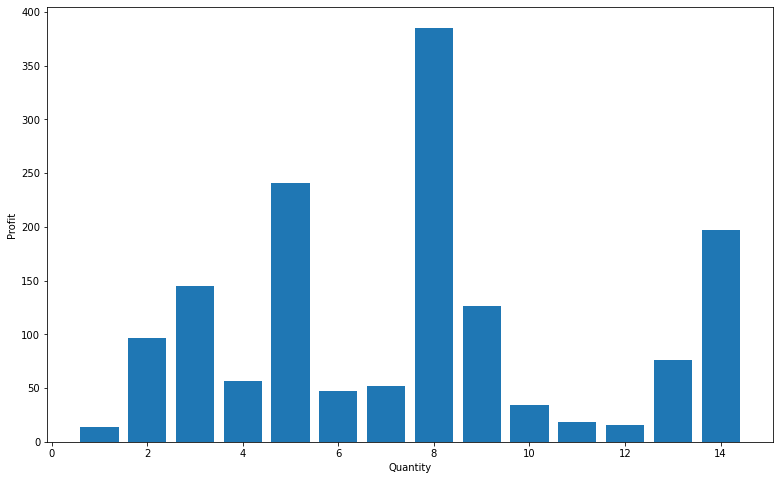

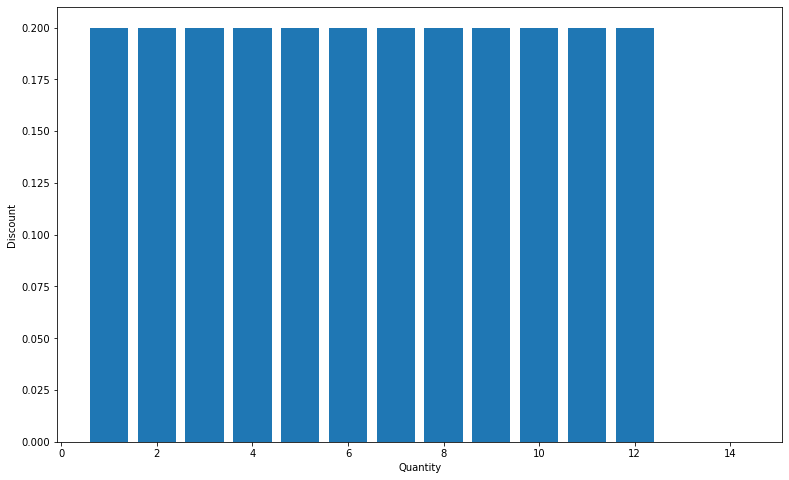

Machines


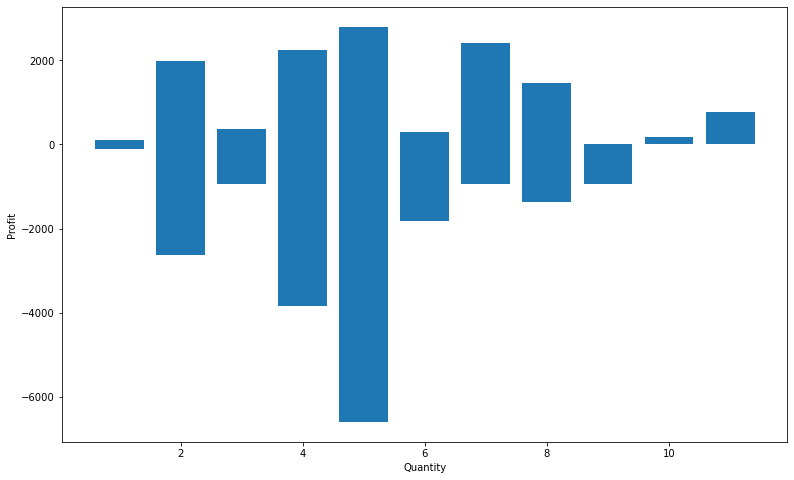

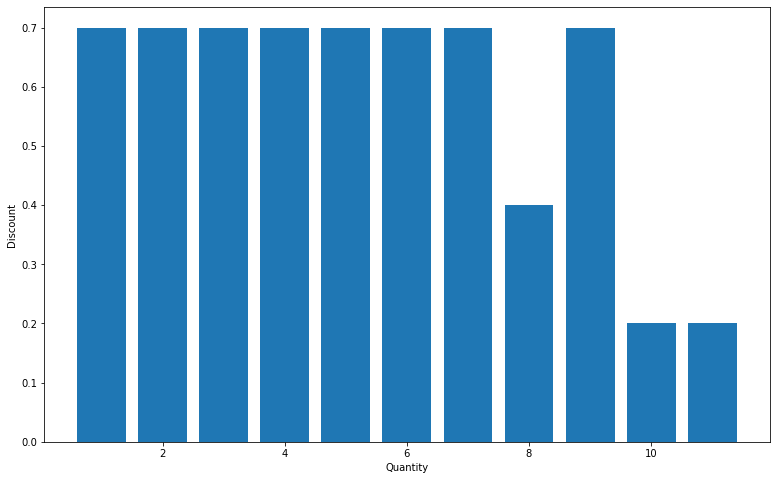

Paper


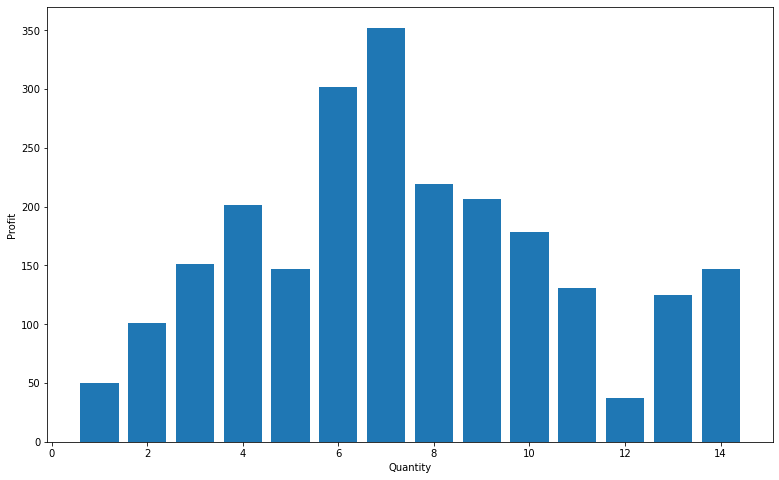

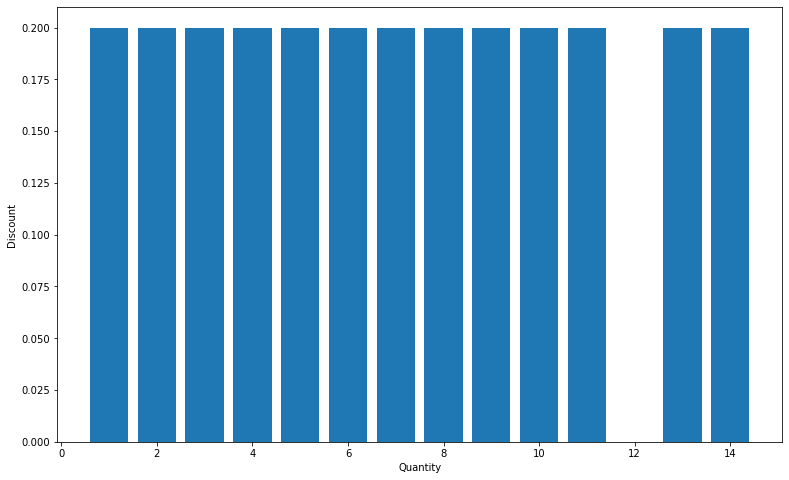

Phones


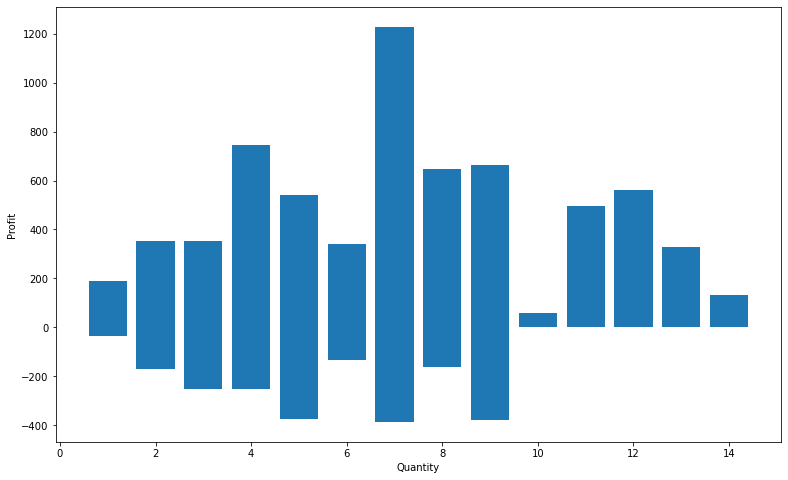

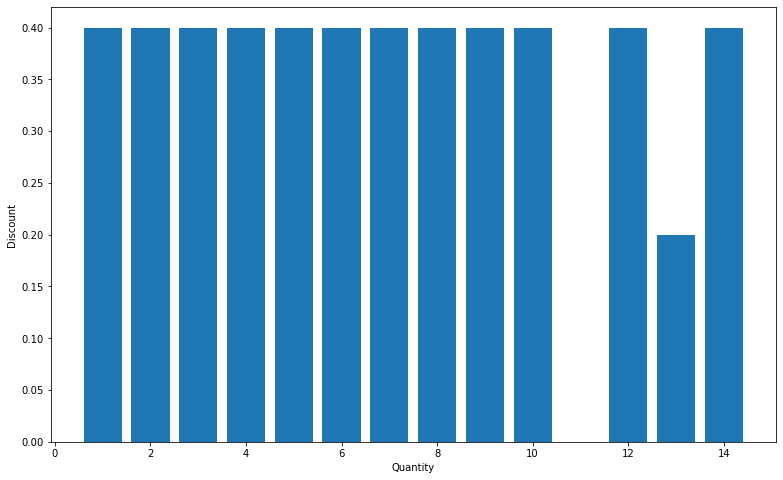

Storage


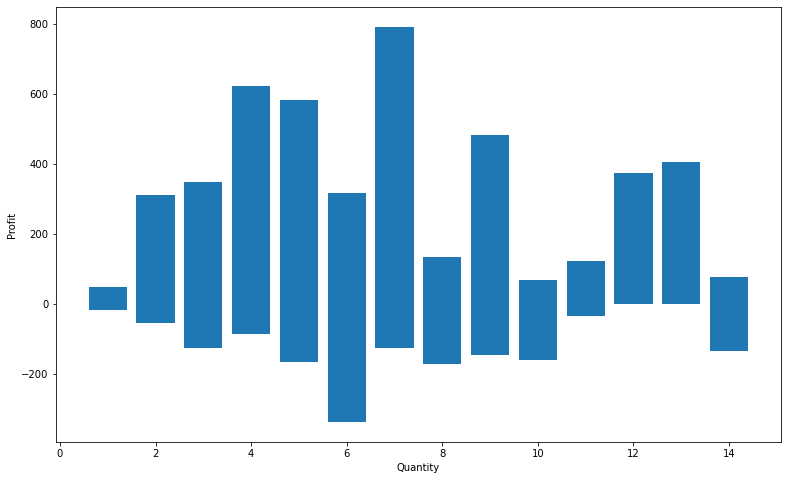

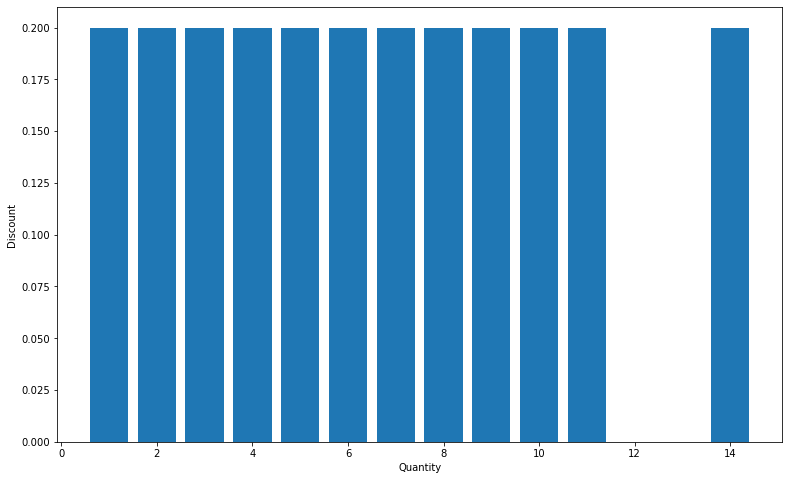

Supplies


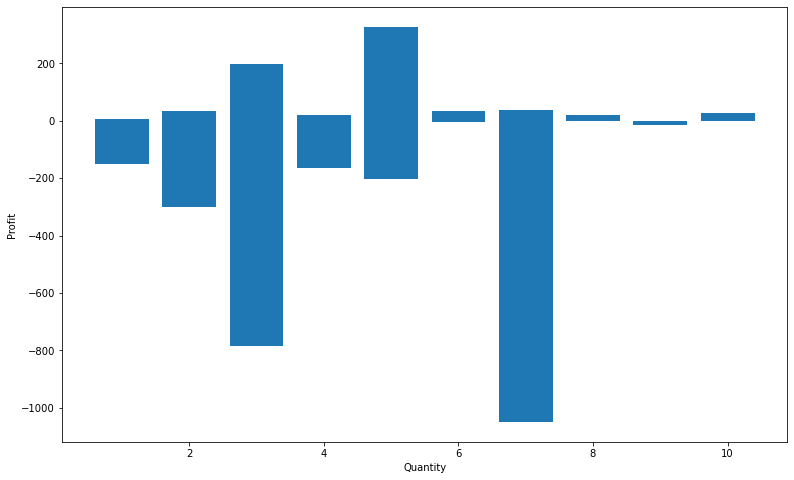

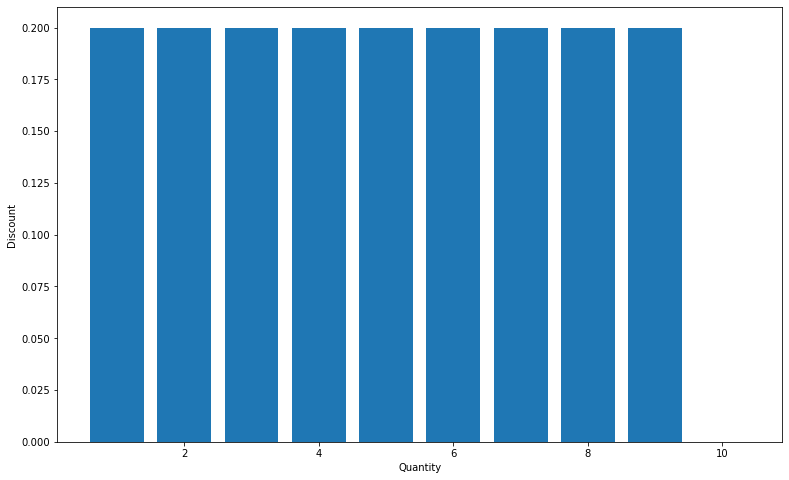

Tables


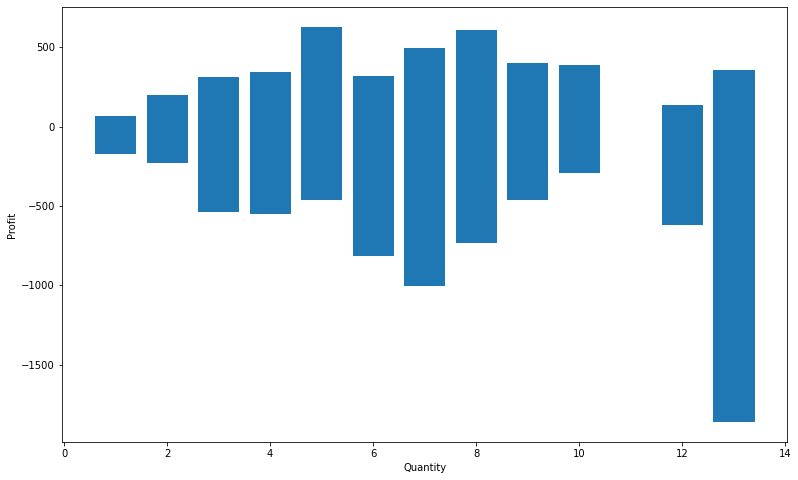

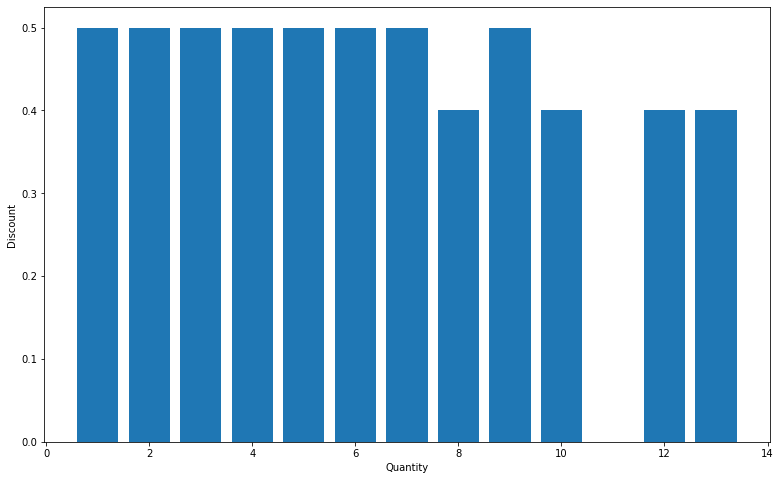

In [63]:
for g,gdata in sub:
  print(g)
  temp=sub.get_group(g)
  a=plt.figure(figsize=(13,8))
  plt.bar(temp["Quantity"],temp["Profit"])
  plt.xlabel("Quantity")
  plt.ylabel("Profit")
  plt.show()
  b=plt.figure(figsize=(13,8))
  plt.bar(temp["Quantity"],temp["Discount"])
  plt.xlabel("Quantity")
  plt.ylabel("Discount")
  plt.show()

In [64]:
ps=data.groupby('Sub-Category')['Sales','Profit'].sum()
ps

<ipython-input-64-9b80fa967234>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ps=data.groupby('Sub-Category')['Sales','Profit'].sum()


,Sales,Profit
Sub-Category,,
Accessories,167380.3180,41936.6357
Appliances,107532.1610,18138.0054
Art,27118.7920,6527.7870
Binders,203412.7330,30221.7633
Bookcases,114879.9963,-3472.5560
Chairs,328449.1030,26590.1663
Copiers,149528.0300,55617.8249
Envelopes,16476.4020,6964.1767
Fasteners,3024.2800,949.5182


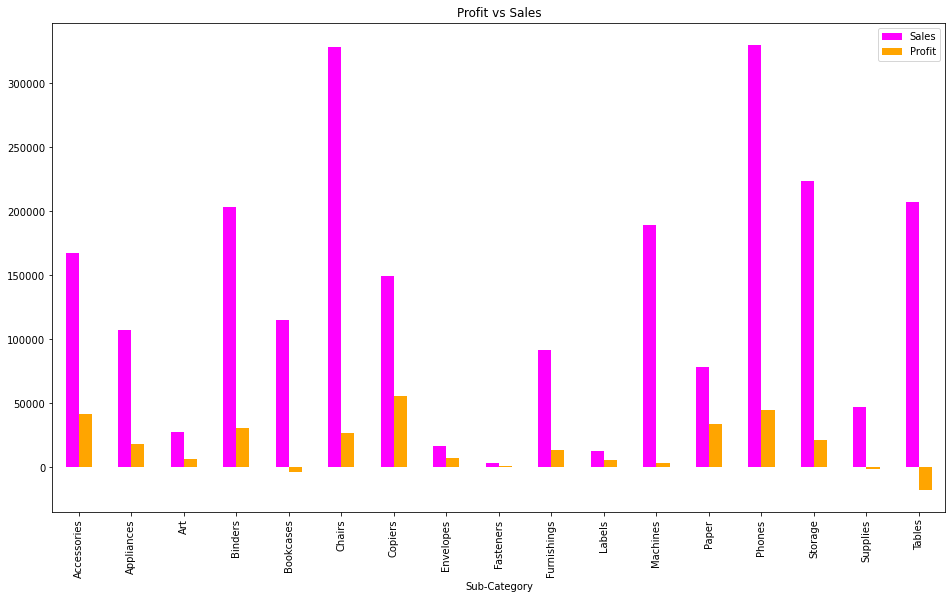

In [65]:
ps.plot.bar(color=['magenta','orange'],figsize=(16,9))
plt.title("Profit vs Sales")
plt.show()

In [66]:
group=data.groupby("Region",as_index=True)["Sales","Profit"].sum()

<ipython-input-66-2427a2d30289>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group=data.groupby("Region",as_index=True)["Sales","Profit"].sum()


In [67]:
group

,Sales,Profit
Region,,
Central,501239.8908,39706.3625
East,678781.2400,91522.7800
South,391721.9050,46749.4303
West,725457.8245,108418.4489


#west region has highest sales,south has lowest
# west has highest profit and central has lowest profit

<AxesSubplot:xlabel='Region'>

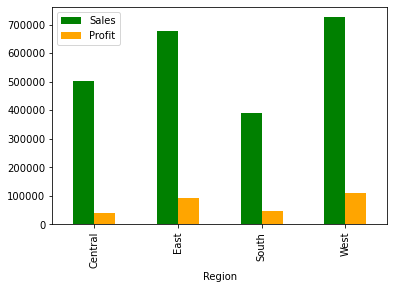

In [68]:
group.plot.bar(color=["green","orange"])

Text(0, 0.5, 'Sales')

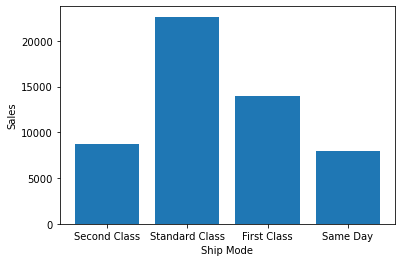

In [69]:
plt.bar(data["Ship Mode"],data["Sales"])
plt.xlabel("Ship Mode")
plt.ylabel("Sales")
#standard class has highest sales and same day has lowest

Text(0, 0.5, 'Sales')

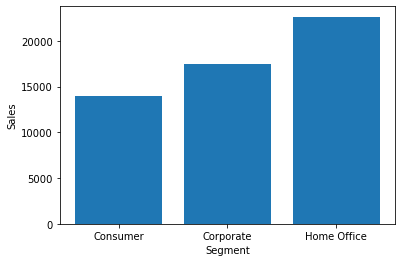

In [70]:
plt.bar(data["Segment"],data["Sales"])
plt.xlabel("Segment")
plt.ylabel("Sales")
#homeoffice segment has highest sales and consumer segment has lowest sales

In [71]:
q=data.groupby("Region",as_index=False)[["Quantity"]].sum()
q

,Region,Quantity
0,Central,8780
1,East,10618
2,South,6209
3,West,12266


Text(0, 0.5, 'Quantity')

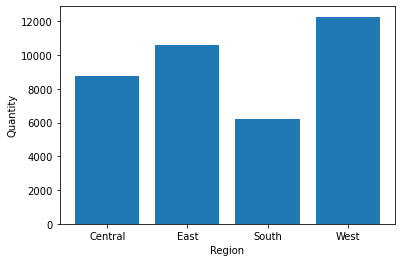

In [72]:
plt.bar("Region","Quantity",data=q)
plt.xlabel("Region")
plt.ylabel("Quantity")
#West region has highest quantity and south has lowest which was obvoius from the sales graph

In [73]:
d=data.groupby("Region",as_index=False)[["Quantity","Discount"]].sum()

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Quantity', ylabel='Discount'>

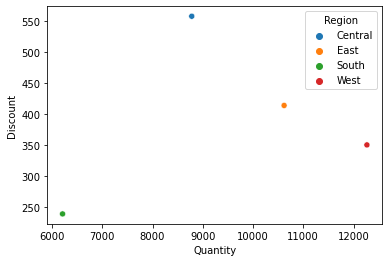

In [74]:
sns.scatterplot("Quantity","Discount",data=d,hue="Region")

In [75]:
category=data.groupby("Category")[["Sales","Profit"]].sum()
category

,Sales,Profit
Category,,
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8008
Technology,836154.0330,145454.9481


<AxesSubplot:xlabel='Category'>

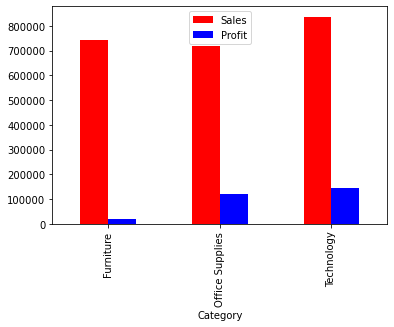

In [76]:
category.plot.bar(color=["red","blue"])

In [77]:
city=data.groupby("City",as_index=False)[["Sales","Profit"]].sum()
city

,City,Sales,Profit
0,Aberdeen,25.500,6.6300
1,Abilene,1.392,-3.7584
2,Akron,2729.986,-186.6356
3,Albuquerque,2220.160,634.0881
4,Alexandria,5519.570,318.6183
...,...,...,...
526,Woonsocket,195.550,78.6791
527,Yonkers,7657.666,2767.7557
528,York,817.978,-102.1692
529,Yucaipa,50.800,13.2080


In [78]:
city[city["Sales"]==city["Sales"].max()]

,City,Sales,Profit
329,New York City,256368.161,62036.9837


In [79]:
city[city["Sales"]==city["Sales"].min()]

,City,Sales,Profit
1,Abilene,1.392,-3.7584


In [80]:
city[city["Profit"]==city["Profit"].min()]

,City,Sales,Profit
374,Philadelphia,109077.013,-13837.7674


In [81]:
state=data.groupby("State")[["Sales","Profit"]].sum()

<AxesSubplot:xlabel='State'>

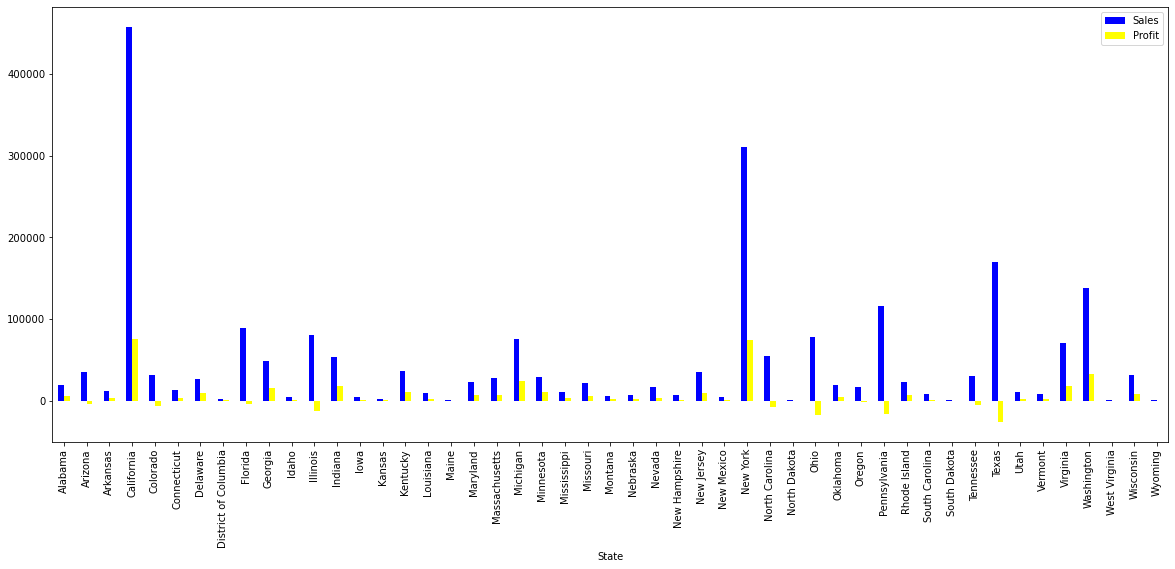

In [82]:
state.plot.bar(color=["blue","yellow"],figsize=(20,8))

In [83]:
state[state["Sales"]==state["Sales"].max()]

,Sales,Profit
State,,
California,457687.6315,76381.3871


In [84]:
state[state["Sales"]==state["Sales"].min()]

,Sales,Profit
State,,
North Dakota,919.91,230.1497


In [85]:
state[state["Profit"]==state["Profit"].max()]

,Sales,Profit
State,,
California,457687.6315,76381.3871


In [86]:
state[state["Profit"]==state["Profit"].min()]

,Sales,Profit
State,,
Texas,170188.0458,-25729.3563


In [87]:
state[state["Profit"]<0]

,Sales,Profit
State,,
Arizona,35282.0010,-3427.9246
Colorado,32108.1180,-6527.8579
Florida,89473.7080,-3399.3017
Illinois,80166.1010,-12607.8870
North Carolina,55603.1640,-7490.9122
Ohio,78258.1360,-16971.3766
Oregon,17431.1500,-1190.4705
Pennsylvania,116511.9140,-15559.9603
Tennessee,30661.8730,-5341.6936


#CONCLUSION
1. Fasterners have lowest sales
2. Tables have least profit
3. West region has highest sales whereas South region has lowest
4. West region has highest profit whereas Central region has lowest
5. Standard class has highest sales and "same day" has lowest sales
6. Homeoffice segment has highest sales and consumer segment has lowest sales
7. West region oders highest quantity and South region has lowest as prevailant from the sales graph
8. Least profit obtained from furniture, infact it's facing loss.
9. Office Supplies has least sales
10. Abilene City has minimum sales
11. Philadelphia has minimum Profit
12. North Dakota has minimum sales
13. Texas has least profit
